In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pickle

In [3]:
import json

def load_json_data(file: str):
    with open(file, 'tr', encoding="UTF-8") as json_file:
        data = json.load(json_file)
    return data

def save_json_data(file: str, json_data):
    with open(file, 'tw', encoding="UTF-8") as outfile:
        json.dump(json_data, outfile, indent=4, ensure_ascii=False)

In [4]:
tokenizer = Tokenizer()

data = load_json_data("all.json")
corpus = []
for d in data:
    corpus.append(d.lower())

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

{'i': 1, 'się': 2, 'w': 3, 'na': 4, 'nie': 5, 'z': 6, 'do': 7, 'że': 8, 'a': 9, 'to': 10, 'pan': 11, 'wokulski': 12, 'za': 13, 'o': 14, 'ale': 15, 'co': 16, 'jak': 17, 'mu': 18, 'po': 19, 'jest': 20, 'tak': 21, 'od': 22, 'go': 23, 'mnie': 24, 'tylko': 25, 'już': 26, 'panna': 27, 'ja': 28, 'jej': 29, 'mi': 30, 'nawet': 31, 'izabela': 32, 'który': 33, 'jego': 34, 'może': 35, 'ten': 36, 'sobie': 37, 'czy': 38, 'jeszcze': 39, 'ma': 40, 'dla': 41, 'ze': 42, 'panie': 43, 'on': 44, 'rubli': 45, 'tym': 46, 'był': 47, 'bardzo': 48, 'więc': 49, 'tysięcy': 50, 'albo': 51, 'wokulskiego': 52, 'tej': 53, 'przez': 54, 'ignacy': 55, 'bo': 56, 'ażeby': 57, 'pana': 58, 'przy': 59, 'dziś': 60, 'nim': 61, 'chwili': 62, 'było': 63, 'tego': 64, 'człowiek': 65, 'nic': 66, 'przed': 67, 'jeżeli': 68, 'tu': 69, 'odparł': 70, 'rzekł': 71, 'będzie': 72, 'znowu': 73, 'mówił': 74, 'no': 75, 'pani': 76, 'wszystko': 77, 'u': 78, 'kiedy': 79, 'gdy': 80, 'ją': 81, 'ich': 82, 'nad': 83, 'nas': 84, 'tomasz': 85, 'jednak'

In [5]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
with open('max_sequence_len.pickle', 'wb') as handle:
    pickle.dump(max_sequence_len, handle, protocol=pickle.HIGHEST_PROTOCOL)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
3073/3073 [==============================] - 764s 246ms/step - loss: 8.3773 - accuracy: 0.0517
Epoch 2/100
3073/3073 [==============================] - 752s 245ms/step - loss: 7.3725 - accuracy: 0.0859
Epoch 3/100
3073/3073 [==============================] - 722s 235ms/step - loss: 6.2983 - accuracy: 0.1074
Epoch 4/100
3073/3073 [==============================] - 724s 236ms/step - loss: 5.3411 - accuracy: 0.1431
Epoch 5/100
3073/3073 [==============================] - 733s 239ms/step - loss: 4.7609 - accuracy: 0.1817
Epoch 6/100
3073/3073 [==============================] - 716s 233ms/step - loss: 4.4443 - accuracy: 0.2091
Epoch 7/100
3073/3073 [==============================] - 721s 235ms/step - loss: 4.2471 - accuracy: 0.2251
Epoch 8/100
3073/3073 [==============================] - 744s 242ms/step - loss: 4.1278 - accuracy: 0.2364
Epoch 9/100
3073/3073 [==============================] - 733s 239ms/step - loss: 4.0265 - accuracy: 0.2467
Epoch 10/100
3073/3073 [=============

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

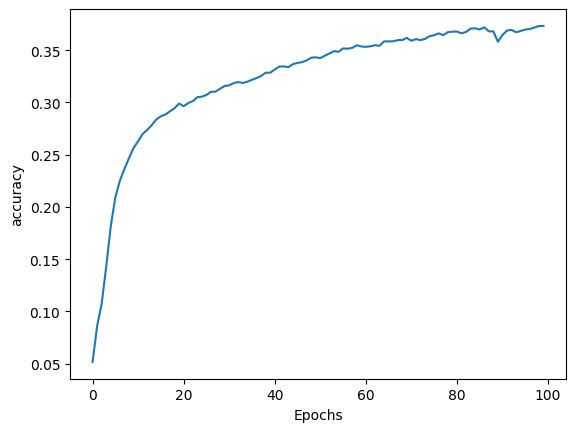

In [8]:
plot_graphs(history, 'accuracy')

In [13]:
seed_text = "Rzecki spojrzał"
next_words = 13
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 24ms/step
Rzecki spojrzał na ulicę odesłał powóz do nas adiutant aniżeli przypuszczasz pani wieniec dla niego


In [14]:
model.save('saved_model/lalka')

INFO:tensorflow:Assets written to: saved_model/lalka\assets


INFO:tensorflow:Assets written to: saved_model/lalka\assets
